## Lab 0 Visualization: auto-mpg.data

Name: Clark Harrison Dy

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


First off, let's start by loading the auto-mpg.data file

In [3]:
data = pd.read_fwf('auto-mpg.data', sep='\t', na_values='?', lineterminator='\n', names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin", "car name"])

Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

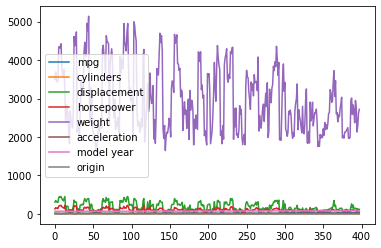

In [4]:
data.plot()

Let's look at the mpg distribution (using a histogram)

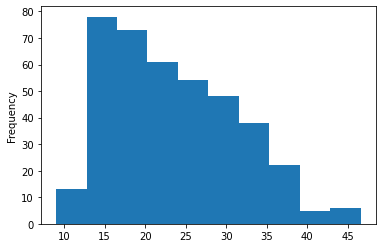

In [14]:
data['mpg'].plot.hist();

For this example, let's check how many instances have a certain origin value

In [11]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

We were able to access the origin column with dot notation. This is because the column name is 'nice' enough to be a python variable name.

Do we have similar mpg in between origins?  
We can plot the histograms for each origin side by side directly form the dataframe:

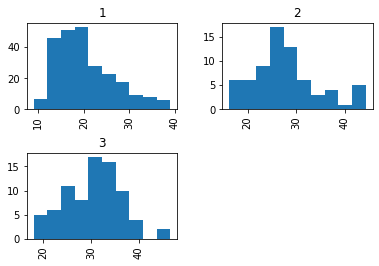

In [25]:
axs = data.hist(column='mpg', by='origin')


To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

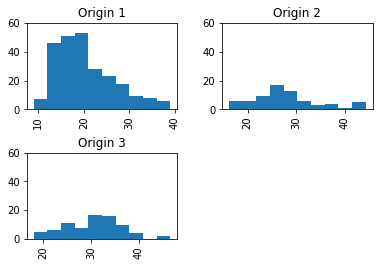

In [40]:
axs = data.hist(column='mpg', by='origin')
axs[0][0].set(title='Origin 1', ylim=[0, 60])
axs[0][1].set(title='Origin 2', ylim=[0, 60])
axs[1][0].set(title='Origin 3', ylim=[0, 60]);

Is mpg and horsepower correlated? Maybe it is different per origin value?  
Let's have a look with a scatter plot.

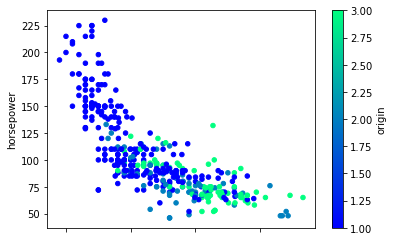

In [42]:
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

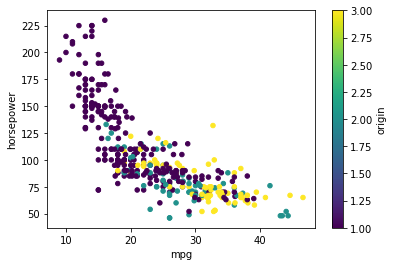

In [43]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='viridis', ax=ax);

Instead of a colorbar, we can assign a specific color to a certain value of the origin.

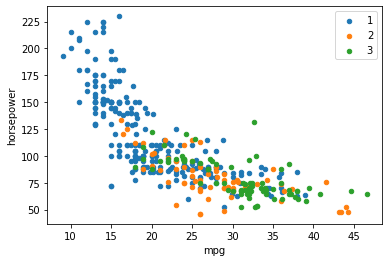

In [44]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [45]:
import seaborn as sns

Let's re-create the histograms by origin with seaborn with the figure level `displot()` function.

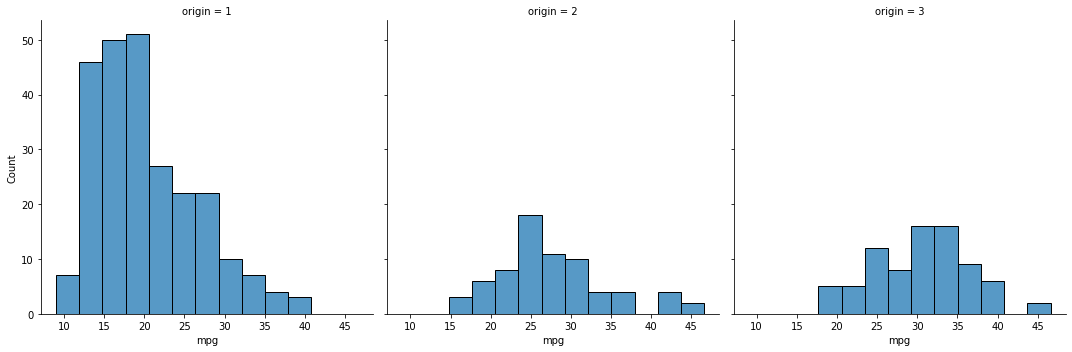

In [46]:
# Use origin to split mpg into columns
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

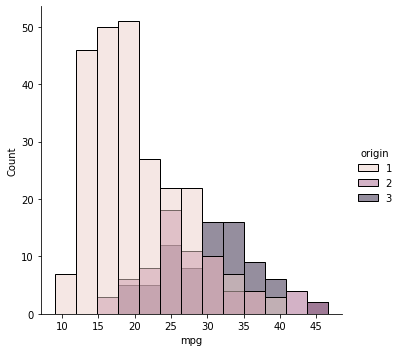

In [47]:
# Use origin to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split between origins, we can stack the counts, adding up to total.

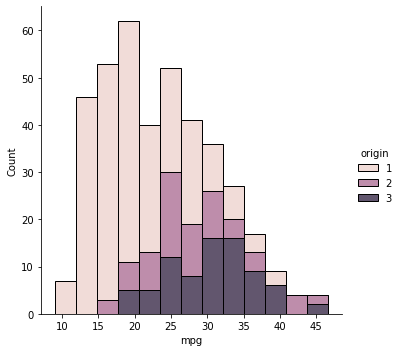

In [48]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in mpg with a boxplot too

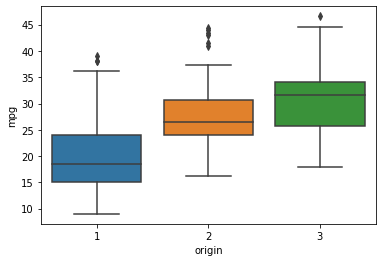

In [49]:
sns.boxplot(x='origin', y='mpg', data=data);

Let's re-create the scatter plot to see if mpg and horsepower are correlated by gender.

To make the legend show strings we will create a origin string column.

In [50]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['Origin 1', 'Origin 2', 'Origin 3'])

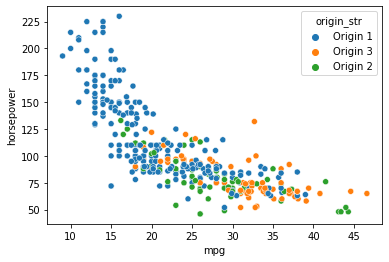

In [51]:
ax = sns.scatterplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

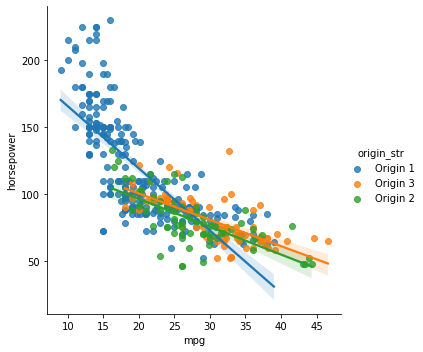

In [52]:
ax = sns.lmplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

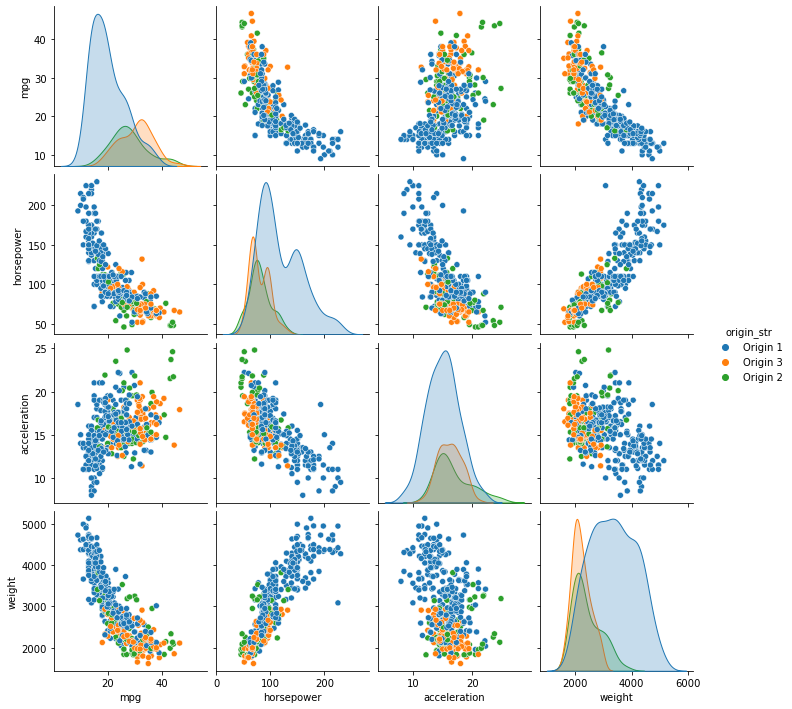

In [53]:
sns.pairplot(data, vars=['mpg', 'horsepower', 'acceleration', 'weight'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

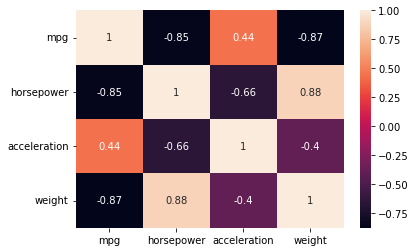

In [54]:
g = sns.heatmap(data[['mpg', 'horsepower', 'acceleration', 'weight']].corr(method='spearman'), 
            annot=True)